In [33]:
from torch import nn, optim
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F
%matplotlib inline

In [34]:
with open('./PITdf.pkl','rb') as f:
    PITdf = pickle.load(f)
with open('./GREdf.pkl','rb') as f:
    GREdf = pickle.load(f)
with open('./JONdf.pkl','rb') as f:
    JONdf = pickle.load(f)
with open('./MGTdf.pkl','rb') as f:
    MGTdf = pickle.load(f)
with open('./WASdf.pkl','rb') as f:
    WASdf = pickle.load(f)
with open('./WHLdf.pkl','rb') as f:
    WHLdf = pickle.load(f)
with open('./PKSdf.pkl','rb') as f:
    PKSdf = pickle.load(f)
with open('./CBGdf.pkl','rb') as f:
    CBGdf = pickle.load(f)
with open('./STUdf.pkl','rb') as f:
    STUdf = pickle.load(f)
with open('./NPHdf.pkl','rb') as f:
    NPHdf = pickle.load(f)
with open('./ELVdf.pkl','rb') as f:
    ELVdf = pickle.load(f)
with open('./YGTdf.pkl','rb') as f:
    YGTdf = pickle.load(f)
with open('./NCSdf.pkl','rb') as f:
    NCSdf = pickle.load(f)
with open('./BUTdf.pkl','rb') as f:
    BUTdf = pickle.load(f)
with open('./KITdf.pkl','rb') as f:
    KITdf = pickle.load(f)

# t-1 include time, date, from one city

In [35]:
all_data = np.concatenate((PITdf['DNI'].values.reshape(-1,1), BUTdf['DNI'].values.reshape(-1,1), \
                           GREdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), NCSdf['DNI'].values.reshape(-1,1), \
                           KITdf['DNI'].values.reshape(-1,1), \
                           PITdf['day_x'].values.reshape(-1,1), PITdf['day_y'].values.reshape(-1,1), \
                           PITdf['time_x'].values.reshape(-1,1), PITdf['time_y'].values.reshape(-1,1)),axis = 1)
all_data.shape

(367920, 13)

In [36]:
test_length = 365 * 48 * 1
train_length = 365 * 48 * 5
all_data = all_data[:(train_length + test_length), :]
all_data.shape


(105120, 13)

In [37]:
inputs = all_data[:-1,:]
targets = all_data[1:,0]
print(inputs[25:35,:])
print(targets[25:35])

[[ 3.34000000e+02  8.25000000e+02  1.81000000e+02  8.42000000e+02
   8.49000000e+02  8.43000000e+02  8.44000000e+02  8.33000000e+02
   1.81000000e+02  1.72133562e-02  9.99851839e-01 -1.30526192e-01
  -9.91444861e-01]
 [ 8.44000000e+02  8.40000000e+02  3.40000000e+02  8.56000000e+02
   8.64000000e+02  8.57000000e+02  8.59000000e+02  8.44000000e+02
   1.86000000e+02  1.72133562e-02  9.99851839e-01 -2.58819045e-01
  -9.65925826e-01]
 [ 8.32000000e+02  8.27000000e+02  8.29000000e+02  8.43000000e+02
   8.52000000e+02  8.45000000e+02  8.47000000e+02  8.31000000e+02
   8.19000000e+02  1.72133562e-02  9.99851839e-01 -3.82683432e-01
  -9.23879533e-01]
 [ 8.25000000e+02  8.17000000e+02  8.27000000e+02  4.04000000e+02
   8.38000000e+02  8.29000000e+02  8.38000000e+02  8.16000000e+02
   8.14000000e+02  1.72133562e-02  9.99851839e-01 -5.00000000e-01
  -8.66025404e-01]
 [ 7.90000000e+02  7.82000000e+02  7.93000000e+02  7.93000000e+02
   8.05000000e+02  7.95000000e+02  8.05000000e+02  7.81000000e+02


In [38]:
X_train = inputs[:train_length,:]
y_train = targets[:train_length]

X_test = inputs[train_length:,:]
y_test = targets[train_length:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train[30:35,:], y_train[30:35])

(87600, 13) (87600,)
(17519, 13) (17519,)
[[ 7.46000000e+02  7.38000000e+02  7.53000000e+02  7.49000000e+02
   7.59000000e+02  7.51000000e+02  7.61000000e+02  7.39000000e+02
   7.34000000e+02  1.72133562e-02  9.99851839e-01 -7.07106781e-01
  -7.07106781e-01]
 [ 6.72000000e+02  6.63000000e+02  6.78000000e+02  6.77000000e+02
   6.88000000e+02  6.80000000e+02  6.88000000e+02  6.65000000e+02
   6.57000000e+02  1.72133562e-02  9.99851839e-01 -7.93353340e-01
  -6.08761429e-01]
 [ 5.70000000e+02  5.57000000e+02  5.73000000e+02  5.78000000e+02
   5.88000000e+02  5.82000000e+02  5.87000000e+02  5.61000000e+02
   5.49000000e+02  1.72133562e-02  9.99851839e-01 -8.66025404e-01
  -5.00000000e-01]
 [ 3.88000000e+02  3.71000000e+02  3.86000000e+02  4.04000000e+02
   4.19000000e+02  4.10000000e+02  4.11000000e+02  3.80000000e+02
   3.57000000e+02  1.72133562e-02  9.99851839e-01 -9.23879533e-01
  -3.82683432e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.000

In [39]:
scaler = MinMaxScaler()

X_train_normalized = scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [40]:
X_train_normalized = torch.from_numpy(X_train_normalized).float()
y_train = torch.squeeze(torch.from_numpy(y_train).float())

X_test_normalized = torch.from_numpy(X_test_normalized).float()



In [41]:
class Net(torch.nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.relu(self.fc3(x))


In [42]:
net1 = Net(X_train.shape[1])
criterion1 = nn.MSELoss()
optimizer = optim.Adam(net1.parameters(), lr = 0.01)


In [43]:
for epoch in range(1000):
    
    y_pred = net1(X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion1(y_pred, y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

tensor(117653.3281, grad_fn=<MseLossBackward>)
tensor(11217.2041, grad_fn=<MseLossBackward>)
tensor(10523.1260, grad_fn=<MseLossBackward>)
tensor(10297.4648, grad_fn=<MseLossBackward>)
tensor(10123.2305, grad_fn=<MseLossBackward>)
tensor(9967.9609, grad_fn=<MseLossBackward>)
tensor(9708.5312, grad_fn=<MseLossBackward>)
tensor(9493.9873, grad_fn=<MseLossBackward>)
tensor(9372.3926, grad_fn=<MseLossBackward>)
tensor(9318.3330, grad_fn=<MseLossBackward>)


In [44]:
y_test_pred = net1(X_test_normalized)
y_test_pred_np = y_test_pred.detach().numpy()[:,0]

Avg error: -0.5001195171130589
Avg absolute error: 41.48606866204655
Err Std: 94.68042573753873
Abs Err Std: 85.10898451010294


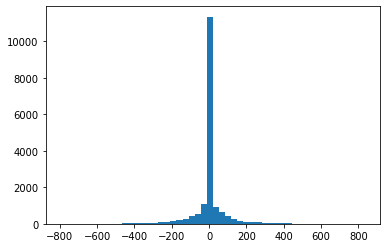

In [45]:
err = np.subtract(y_test_pred_np, y_test)
plt.hist(err, bins = 50)
mean_err = np.mean(err)
abserr = np.abs(err)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(err)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))

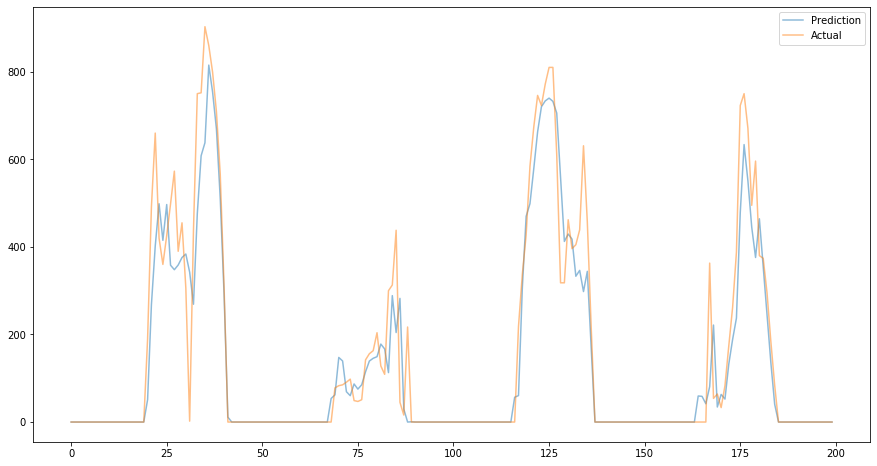

In [46]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.show()

# Use t-1, t-2, t-3, and t-4 from 9 cities

In [47]:
inputs3 = np.concatenate((all_data[3:-1,:], all_data[2:-2,:], all_data[1:-3,:], all_data[:-4,:]), axis = 1)
targets3 = all_data[4:,0]

print(inputs3[15:20,:])
print(targets3[15:20])
print(inputs3.shape)

[[ 5.80000000e+02  5.63000000e+02  0.00000000e+00  1.45000000e+02
   5.71000000e+02  5.63000000e+02  5.87000000e+02  0.00000000e+00
   0.00000000e+00  1.72133562e-02  9.99851839e-01  7.07106781e-01
  -7.07106781e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.65000000e+02  4.11000000e+02  1.70000000e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.72133562e-02  9.99851839e-01
   7.93353340e-01 -6.08761429e-01  1.59000000e+02  1.30000000e+02
   1.73000000e+02  0.00000000e+00  1.48000000e+02  0.00000000e+00
   0.00000000e+00  1.16000000e+02  1.36000000e+02  1.72133562e-02
   9.99851839e-01  8.66025404e-01 -5.00000000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.72133562e-02  9.99851839e-01  9.23879533e-01 -3.82683432e-01]
 [ 1.67000000e+02  4.70000000e+01  2.90000000e+01  7.40000000e+01
   1.82000000e+02  1.21000000e+02  0.00000000e+00  0.00000000e+00
   1.0200

In [48]:
X_train3 = inputs3[:train_length,:]
y_train3 = targets3[:train_length]

X_test3 = inputs3[train_length:,:]
y_test3 = targets3[train_length:]


In [49]:
scaler = MinMaxScaler()

X_train3_normalized = scaler.fit(X_train3)

X_train3_normalized = scaler.transform(X_train3)
X_test3_normalized = scaler.transform(X_test3)



In [50]:
X_train3_normalized = torch.from_numpy(X_train3_normalized).float()
y_train3 = torch.squeeze(torch.from_numpy(y_train3).float())

X_test3_normalized = torch.from_numpy(X_test3_normalized).float()



In [51]:
net5 = Net(X_train3.shape[1])
print(net5)

Net(
  (fc1): Linear(in_features=52, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)


In [52]:
criterion1 = nn.MSELoss()
optimizer = optim.Adam(net5.parameters(), lr = 0.01)

In [53]:
for epoch in range(1000):
    
    y_pred = net5(X_train3_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion1(y_pred, y_train3)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

tensor(117706.1562, grad_fn=<MseLossBackward>)
tensor(11854.0928, grad_fn=<MseLossBackward>)
tensor(10523.7832, grad_fn=<MseLossBackward>)
tensor(10131.6895, grad_fn=<MseLossBackward>)
tensor(9962.5938, grad_fn=<MseLossBackward>)
tensor(9802.8516, grad_fn=<MseLossBackward>)
tensor(9729.9697, grad_fn=<MseLossBackward>)
tensor(9687.0830, grad_fn=<MseLossBackward>)
tensor(9605.2900, grad_fn=<MseLossBackward>)
tensor(9471.6943, grad_fn=<MseLossBackward>)


In [54]:
y_test_pred = net5(X_test3_normalized)
y_test_pred_np = y_test_pred.detach().numpy()[:,0]

Avg error: -1.431564454422176
Avg absolute error: 42.31215827246417
Err Std: 95.20604408761938
Abs Err Std: 85.29901212749672


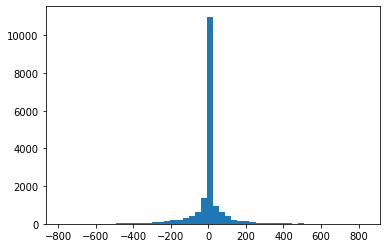

In [55]:
err = np.subtract(y_test_pred_np, y_test3)
plt.hist(err, bins = 50)
mean_err = np.mean(err)
abserr = np.abs(err)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(err)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))

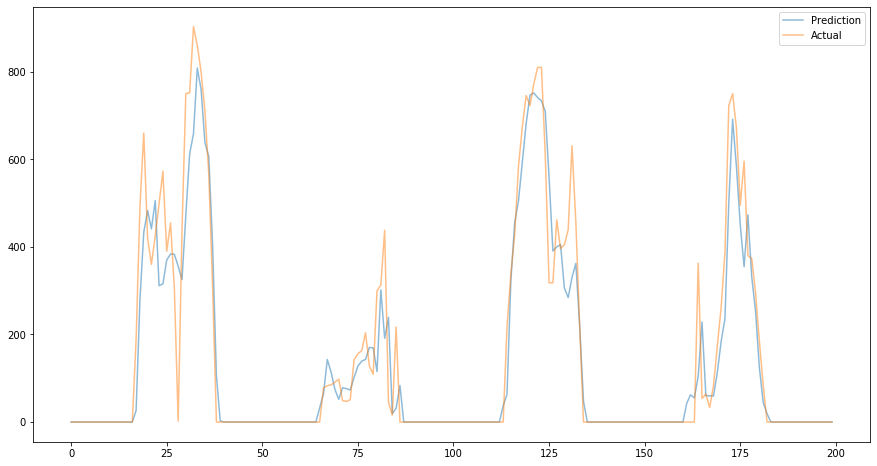

In [56]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(y_test3[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.show()